# Лаборатроная работа №1
1. Длина паузы (Не бинарный классификатор)
2. Ударное ли слово (Бинарный классификатор)

# Этапы:
1. Получить статистику корпуса
2. Балансировка датасета (слов без пауз больше, чем слов с паузами)
3. Извлечь разные признаки, посмотреть варианты
4. Обучить модели и получить метрики

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
from bs4 import BeautifulSoup

with open('Text.xml', 'r') as f:
	file = f.read()

soup = BeautifulSoup(file, 'xml')

[511, 3559, 6225, 5418, 2116, 2103, 2384, 2279, 117]


<BarContainer object of 9 artists>

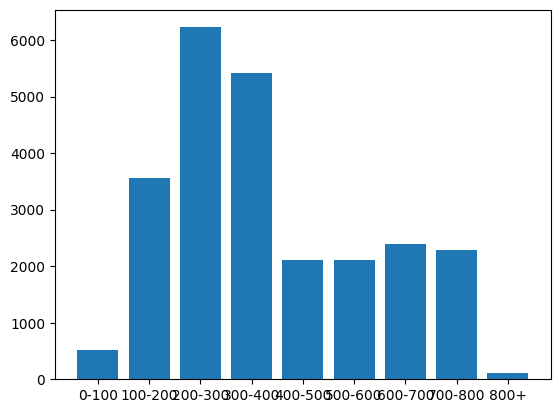

In [15]:
#


word_arr = [0,0,0,0,0,0,0,0,0]
pauses_arr = []

sentences = soup.find_all('sentence')

for sentence in sentences:
    for child in sentence.children:
        if child.name == 'pause':
            time_var = int(child.get('time'))
            if time_var <= 100:
                word_arr[0] += 1
            elif time_var <= 200:
                word_arr[1] += 1
            elif time_var <= 300:
                word_arr[2] += 1
            elif time_var <= 400:
                word_arr[3] += 1
            elif time_var <= 500:
                word_arr[4] += 1
            elif time_var <= 600:
                word_arr[5] += 1
            elif time_var <= 700:
                word_arr[6] += 1
            elif time_var <= 800:
                word_arr[7] += 1
            elif time_var > 800:
                word_arr[8] += 1
                
            
            pauses_arr.append(child.get('time'))
            

len(pauses_arr)           
print(word_arr)
#plt.hist(word_arr)
# show plot bar with small size of text

plt.bar(['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800+'], word_arr)

#Функция для получения признаков

In [9]:
def word_features(word):
    f_dict = {}
    f_dict["word"] = word.get('original')
    
    #count words in sentence
    f_dict['count_words'] = 0
    
    #content features
    content = word.previous_sibling
    
    f_dict['PunktEnd'] = int(content.get('PunktEnd')) if content.get('PunktEnd') else content.get('PunktEnd')
    f_dict['PunktBeg'] = int(content.get('PunktBeg')) if content.get('PunktBeg') else content.get('PunktBeg')
    f_dict['EmphEnd'] = int(content.get('EmphEnd')) if content.get('EmphEnd') else content.get('EmphEnd')
    f_dict['EmphBeg'] = int(content.get('EmphBeg')) if content.get('EmphBeg') else content.get('EmphBeg')
    
    #language features
    letter = [ltr.get('char') for ltr in word.find_all('letter')]
    f_dict['letter_len'] = len(letter)
    f_dict['vowels'] = sum([ltr in 'ауоыиэяюёе' for ltr in letter])
    f_dict['is_yo'] = 1 if 'ё' in letter else 0
    if f_dict['letter_len'] > 0:
        f_dict['vowels_ratio'] = f_dict['vowels'] / f_dict['letter_len']
    else:
        f_dict['vowels_ratio'] = 0
    
    if f_dict['word']:
        f_dict['capital'] = 1 if f_dict["word"][0].isupper() else 0
    else:
        f_dict['capital'] = 0
    
    
    #dictitem features
    dict_item = word.find('dictitem')
    f_dict['form'] = int(dict_item.get('form'))
    f_dict['genesys'] = int(dict_item.get('genesys'))
    sem1 = dict_item.get('semantics1')
    sem2 = dict_item.get('semantics2')
    f_dict['semantics1'] = int(sem1) if sem1 else sem1
    f_dict['semantics2'] = int(sem2) if sem2 else sem2
    f_dict['subpart_of_speech'] = int(dict_item.get('subpart_of_speech'))
    
    #pause features
    f_dict['pause'] = 0
    f_dict['pause_time'] = -1
    
    #stress features
    if word.get('nucleus'):
        f_dict['phrasal_stress'] = 1
    else:
        f_dict['phrasal_stress'] = 0
    
    return f_dict

In [16]:
words_arr = []
pauses_arr = []
sentences = soup.find_all('sentence')

for sentence in sentences:
    len_words = 0
    for child in sentence.children:
        if child.name == 'word':
            words_arr.append(word_features(child))
            words_arr[-1]['count_words'] = len_words
            len_words += 1
        if child.name == 'pause':
            words_arr[-1]['pause'] = 1
            words_arr[-1]['pause_time'] = int(child.get('time'))
    

94962
25696


<BarContainer object of 2 artists>

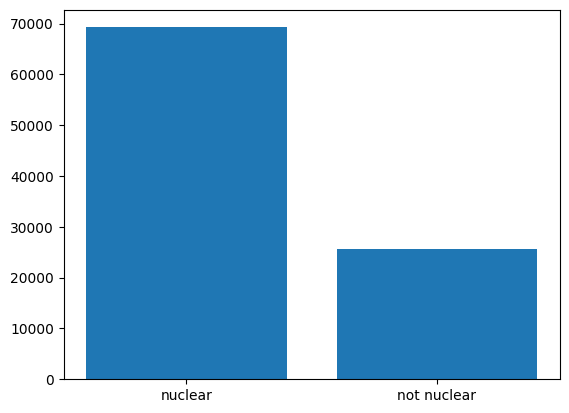

In [21]:
count = 0
for i in words_arr:
    if i['phrasal_stress']:
        count += 1
print(len(words_arr))
print(count)
plt.bar(['nuclear','not nuclear'], [len(words_arr) - count, count])

#Классификация для ядерного слова

In [22]:
X = []
y = []
for word in words_arr:
    X.append([word['form'], word['genesys'], word['subpart_of_speech'], word['phrasal_stress'], 
              word['capital'],word['letter_len'], word['vowels_ratio'],word['vowels'], word['EmphBeg'], 
              word['EmphEnd'], word['PunktBeg'], word['PunktEnd'],word['is_yo']])
    y.append(word['phrasal_stress'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
print(np.array(X_train[0],dtype=np.float64))

[0.         0.         9.         1.         1.         3.
 0.33333333 1.                nan        nan        nan        nan
 0.        ]


In [23]:
word_train, word_test = train_test_split(words_arr, test_size=0.2,shuffle=False)
print(word_test[0])

{'word': 'альбомчик', 'count_words': 6, 'PunktEnd': None, 'PunktBeg': None, 'EmphEnd': None, 'EmphBeg': None, 'letter_len': 9, 'vowels': 3, 'is_yo': 0, 'vowels_ratio': 0.3333333333333333, 'capital': 0, 'form': 5, 'genesys': 4, 'semantics1': None, 'semantics2': None, 'subpart_of_speech': 1, 'pause': 1, 'pause_time': 364, 'phrasal_stress': 1}


In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier().fit(X_train, y_train)


In [25]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

pred_stress = model.predict(X_test)

print(np.shape(pred_stress))

print(np.mean(pred_stress == y_test))
print(classification_report(y_test, pred_stress, labels=[0, 1]))
pred_stress = [True if i == 1 else False for i in pred_stress]

(18993,)
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13956
           1       1.00      1.00      1.00      5037

    accuracy                           1.00     18993
   macro avg       1.00      1.00      1.00     18993
weighted avg       1.00      1.00      1.00     18993



#Регрессия для длины паузы

In [ ]:
def label_encoder(value, ms = 50):
    return 0 if value == -1 else (int(value / ms) + 1)

In [26]:
X = []
y = np.array([])
for word in words_arr:
    temp_x = [word['form'], word['genesys'], word['subpart_of_speech'], word['phrasal_stress'], 
              word['capital'],word['letter_len'], word['vowels_ratio'],word['vowels'],word['pause'],
              word['EmphBeg'],word['EmphEnd'], word['PunktBeg'], word['PunktEnd']]
    X.append(temp_x)
    y = np.append(y,word['pause_time'])
#y = np.where(y == -1, 0, y)
#y = y / 2150
    
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [27]:
from sklearn.ensemble import HistGradientBoostingRegressor

est = HistGradientBoostingRegressor().fit(X_train, y_train)

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

pred_pause_len = est.predict(X_test)

print(mean_absolute_error(y_test, pred_pause_len))

pred_pause_len = np.array([int(i) for i in pred_pause_len])
pred_pause_len = np.where(pred_pause_len == 0, -1, pred_pause_len)

print(f1_score(y_test, pred_pause_len, average='micro'))
print(recall_score(y_test, pred_pause_len, average='micro'))
print(precision_score(y_test, pred_pause_len, average='micro'))

[364.  -1.  -1.  -1.  -1.  -1. 602.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1. 120.  -1. 648.  -1.  -1.  -1.  -1.  -1.  -1. 299.  -1.  -1.  -1.
  -1.  -1.  -1. 202.  -1.  -1.  -1.  -1. 276.  -1.  -1. 367.  -1.  -1.
  -1.  -1. 276.  -1.  -1.  -1. 331.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1. 377.  -1.  -1.  -1.  -1. 800.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1. 296.  -1. 356.  -1. 178. 236.  -1.  -1.  -1.  -1. 295.  -1.  -1.
 633.  -1.  -1.  -1.  -1.  -1. 332.  -1.  -1.  -1.  -1.  -1. 271.  -1.
  -1.  -1.]
29.099830412440458
0.736797767598589
0.736797767598589
0.736797767598589


#Генерируем JSON file

In [13]:
import json

res_arr = []
dict_words = [{'words':[]}]
for count, word in enumerate(word_test):
    if word['count_words'] == 0:
        res_arr.append(dict_words)
        dict_words = []
        dict_word = {'words':[]}
        original = word['word']
        word_content = {'content':original, 'phrasal_stress':pred_stress[count],"pause_len":int(pred_pause_len[count])}
        dict_word['words'].append(word_content)
        dict_words.append(dict_word) 
    else:
        original = word['word']
        word_content = {'content':original, 'phrasal_stress':pred_stress[count],"pause_len":int(pred_pause_len[count])}
        dict_words[-1]['words'].append(word_content)
        
out = []
for sublist in res_arr:
    out.extend(sublist)


dictionary = [{'words':[{'content':2,'phrasal_stress':-1,"pause_len":100},
                       {'content':3,'phrasal_stress':-1,"pause_len":100}]}]
jsonString = json.dumps(out, indent=4,ensure_ascii=False)
jsonFile = open("data.json", "w")
jsonFile.write(jsonString)
jsonFile.close()